# Install libraries

In [1]:
# !pip install -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

# Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

# Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

# Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

Take input for 2 columns for statistical calculation

In [5]:
while True:
    try:
        col1 = input("Enter the 1st column for statistical calculation: ")
        if col1 in df.columns:
            break
        else:
            raise Exception("Column not found in the dataset")
    except Exception as e:
        print(e)

while True:
    try:
        col2 = input("Enter the 2nd column for statistical calculation: ")
        if col2 in df.columns:
            break
        else:
            raise Exception("Column not found in the dataset")
    except Exception as e:
        print(e)

In this specific analysis, we will be focusing on the statistical calculation of the columns 'Sleep Duration (hours)' and  'Physical Activity Level (minutes/day)' from the dataset.

In [6]:
stat_df = df[[col1, col2]]

A snapshot of the selected columns from the dataset is displayed below:

In [7]:
stat_df.head()

,Physical Activity Level,Sleep Duration
0,42,6.1
1,60,6.2
2,60,6.2
3,30,5.9
4,30,5.9


# Descriptive Statistics

In [8]:
# Calculate the variance
variance_df = pd.DataFrame(stat_df.var()).transpose()
variance_df.index = ['var']

# Calculate IQR
Q1 = stat_df.quantile(0.25)
Q3 = stat_df.quantile(0.75)
IQR = Q3 - Q1

IQR_df = pd.DataFrame(IQR).transpose()
IQR_df.index = ['IQR']

# Calculate Range
Range = stat_df.max() - stat_df.min()
Range_df = pd.DataFrame(Range).transpose()
Range_df.index = ['Range']

descriptive_stats_df = pd.concat([stat_df.describe(), variance_df, IQR_df, Range_df])

descriptive_stats_df


,Physical Activity Level,Sleep Duration
count,374.000000,374.000000
mean,59.171123,7.132086
std,20.830804,0.795657
min,30.000000,5.800000
25%,45.000000,6.400000
50%,60.000000,7.200000
75%,75.000000,7.800000
max,90.000000,8.500000
var,433.922381,0.633070
IQR,30.000000,1.400000


The 'stat_df.describe()' result above provides a summary of the statistical measures for the selected columns. It includes the count, mean, variance, standard deviation, minimum, maximum, quartile values and IQR for both 'Sleep Duration (hours)' and 'Physical Activity Level (minutes/day)'.

In [9]:
# Extract the relevant statistics from descriptive_stats_df
def extract_stats_from_df(column_name, df):
    stats = df[column_name]
    
    stats_dict = {
        "count": stats['count'],
        "mean": stats['mean'],
        "std": stats['std'],
        "min": stats['min'],
        "25%": stats['25%'],
        "50%": stats['50%'],
        "75%": stats['75%'],
        "max": stats['max'],
        "var": stats['var'],
        "IQR": stats['IQR'],
        "range": stats['Range']
    }
    return stats_dict

col1_dict = extract_stats_from_df(col1, descriptive_stats_df)
col2_dict = extract_stats_from_df(col2, descriptive_stats_df)

col1_dict, col2_dict


({'count': 374.0,
  'mean': 59.17112299465241,
  'std': 20.830803658071673,
  'min': 30.0,
  '25%': 45.0,
  '50%': 60.0,
  '75%': 75.0,
  'max': 90.0,
  'var': 433.92238104113204,
  'IQR': 30.0,
  'range': 60.0},
 {'count': 374.0,
  'mean': 7.132085561497325,
  'std': 0.7956567308898188,
  'min': 5.8,
  '25%': 6.4,
  '50%': 7.2,
  '75%': 7.8,
  'max': 8.5,
  'var': 0.6330696334102736,
  'IQR': 1.3999999999999995,
  'range': 2.7})

# Plot diagrams

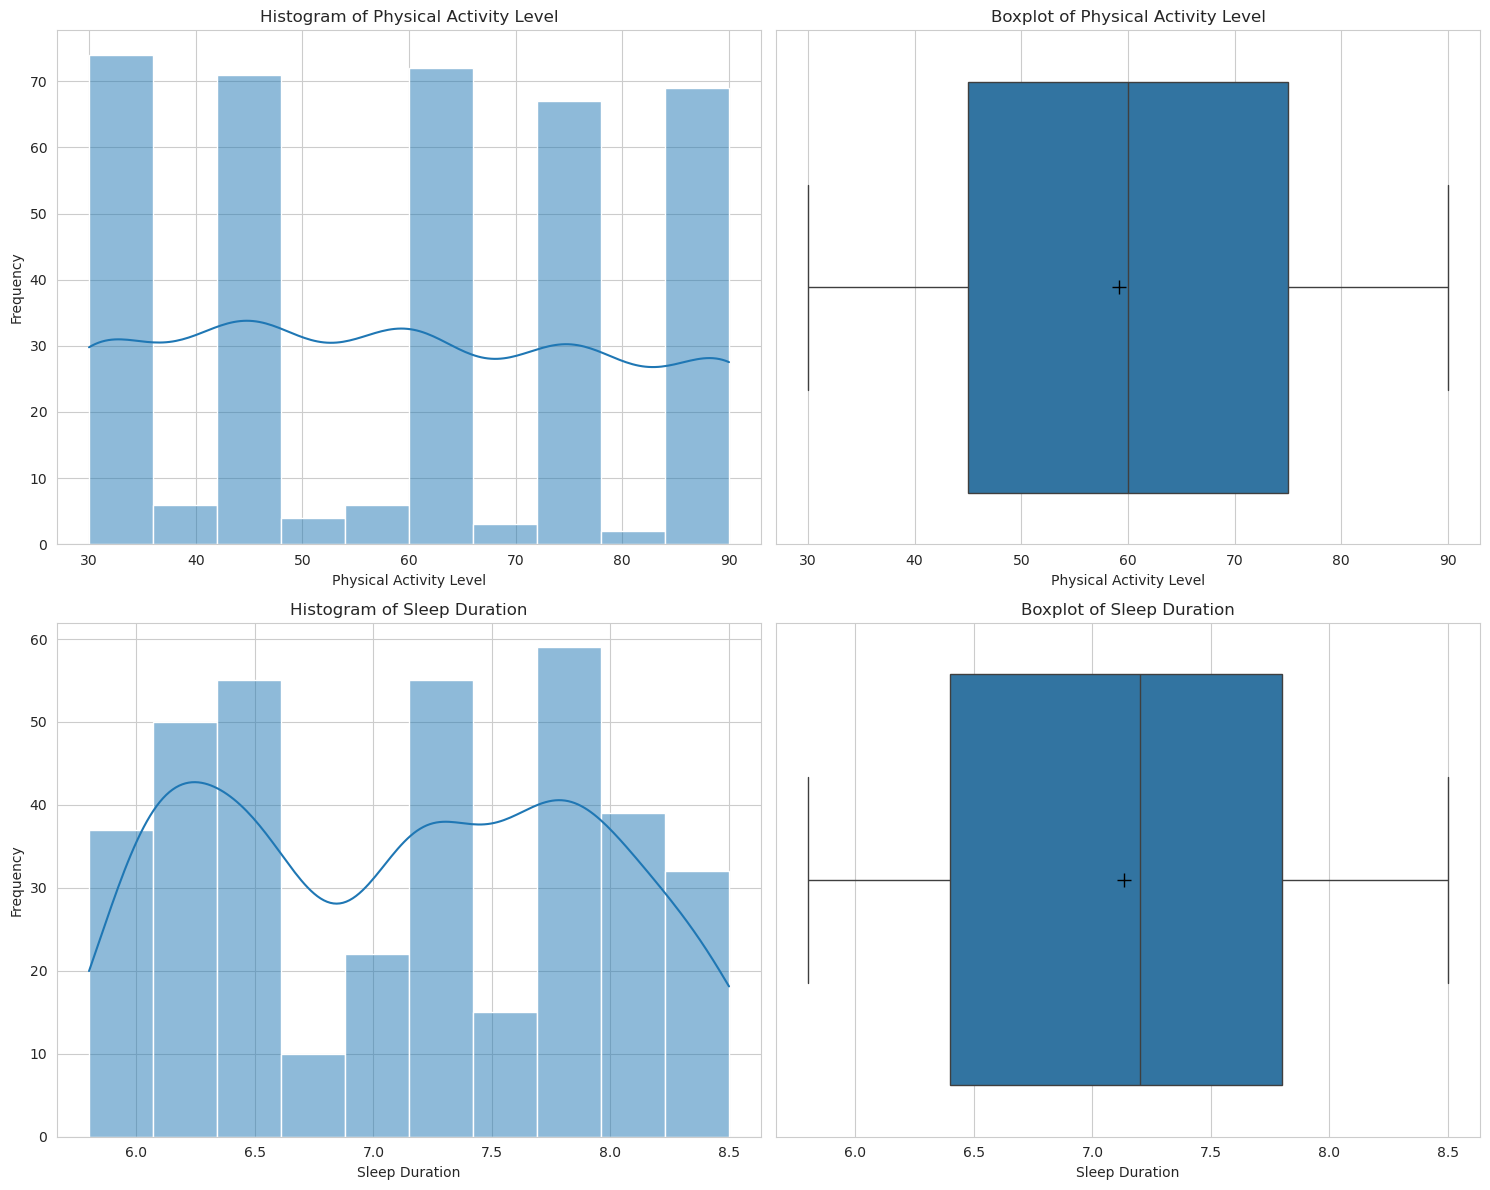

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Histogram and Box Plot for Physical Activity Level
sns.histplot(stat_df[col1], ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f'Histogram of {col1}')
axs[0, 0].set_xlabel(col1)
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(x=stat_df[col1], ax=axs[0, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[0, 1].set_title(f'Boxplot of {col1}')
axs[0, 1].set_xlabel(col1)

# Histogram and Box Plot for Sleep Duration
sns.histplot(stat_df[col2], ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f'Histogram of {col2}')
axs[1, 0].set_xlabel(col2)
axs[1, 0].set_ylabel('Frequency')

sns.boxplot(x=stat_df[col2], ax=axs[1, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[1, 1].set_title(f'Boxplot of {col2}')
axs[1, 1].set_xlabel(col2)

plt.tight_layout()
plt.show()